## **Árvores de Decisão**

O objetivo é explorar melhor como funcionam os algoritmos de arvores de decisão, baseado nesse [link](https://www.diva-portal.org/smash/get/diva2:1458832/FULLTEXT01.pdf)

O algoritmo de arvore de decisões são:

1.   Modelo de ML superviosionado
2.   Divisão dos dados em grupos homogêneos
3.   São bons para classificação ou regressão
4.   Propenso a overfitting 



#### **Arvores de Classificação - Exemplo**

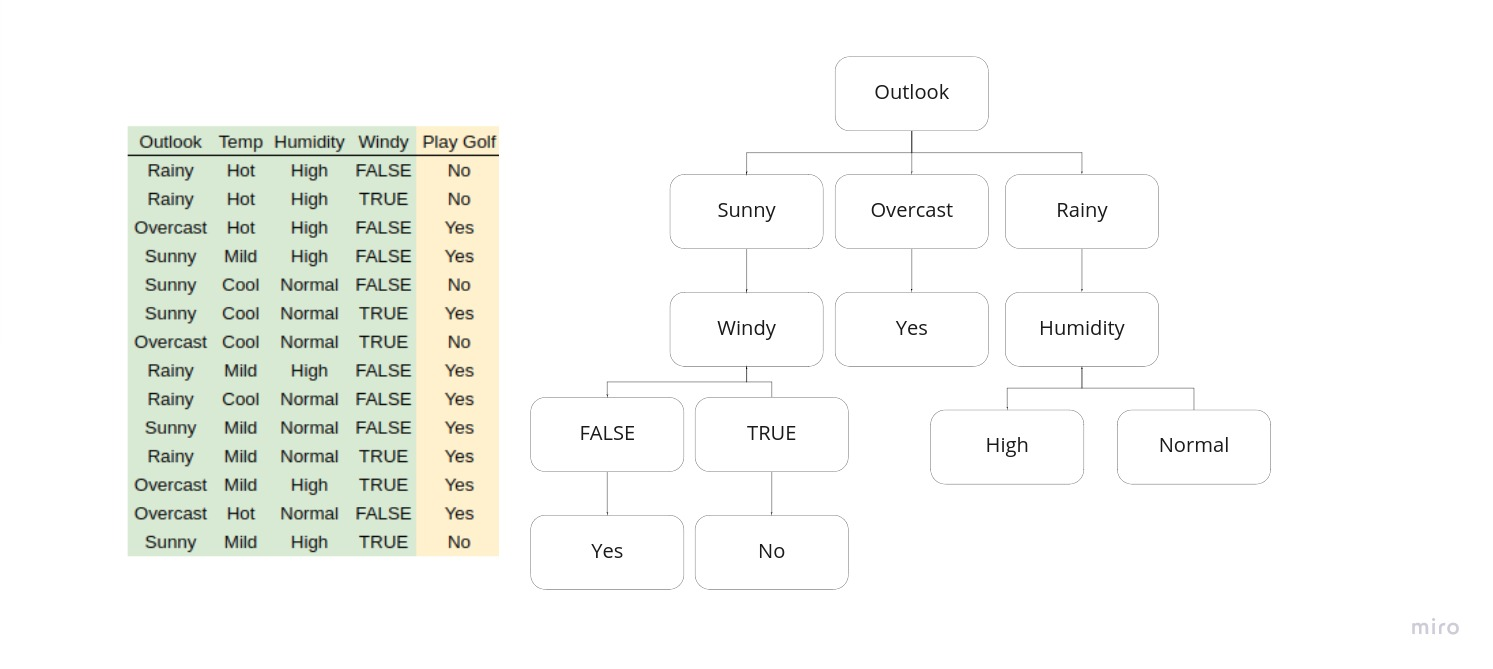

Podemos ter números contínuos no lugar de yes e no e teremos uma *árvore de regressão*

#### O objetivo é encontrar o atributo que melhor divide os dados. Encontrar o subconjunto com maior pureza



1.   Indice de Gini
2.   Chi Square
3.   Information Gain
4.   Redução de Variância





#### **Exemplo de cálculo para o indice de Gini**

#####Dividimos em dois grupos, o primeiro por Gênero e o segundo pela sala do aluno e analisamos qual feature nos dá o grupo mais homogêneo

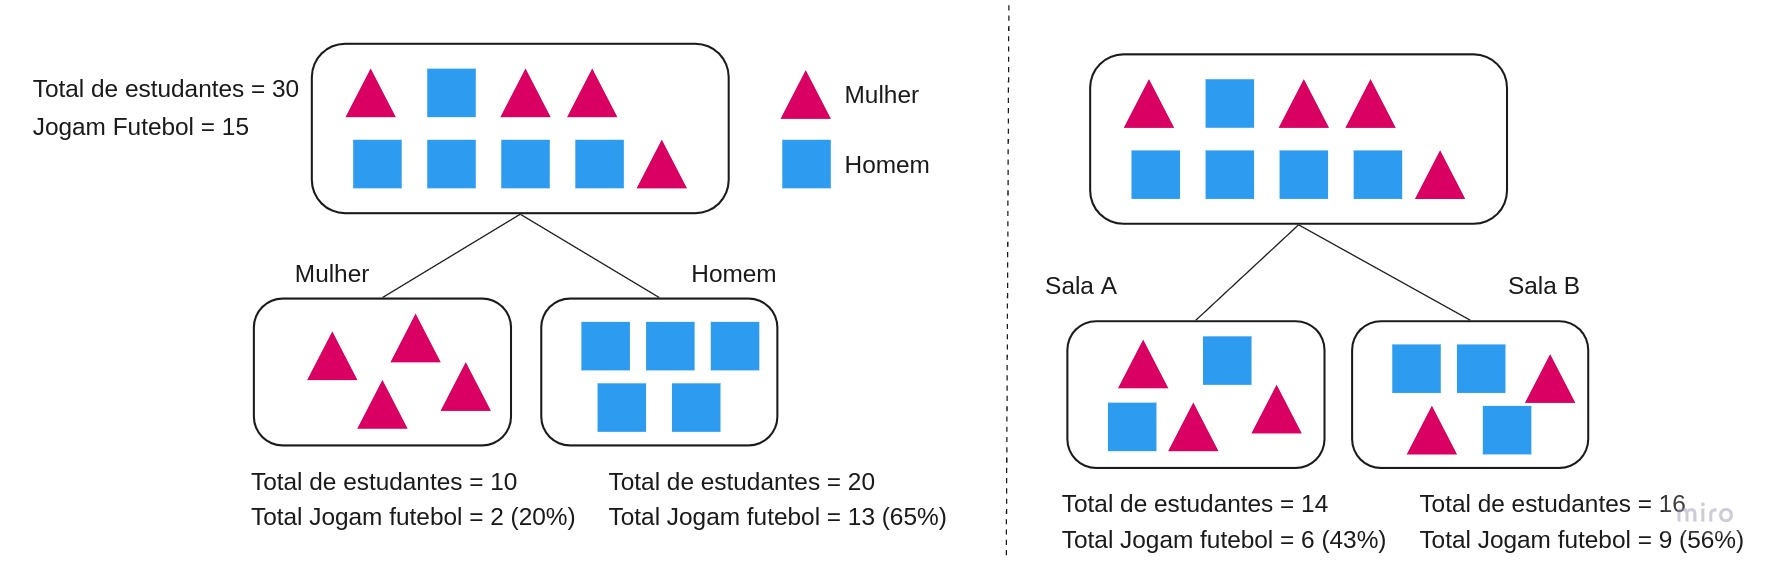

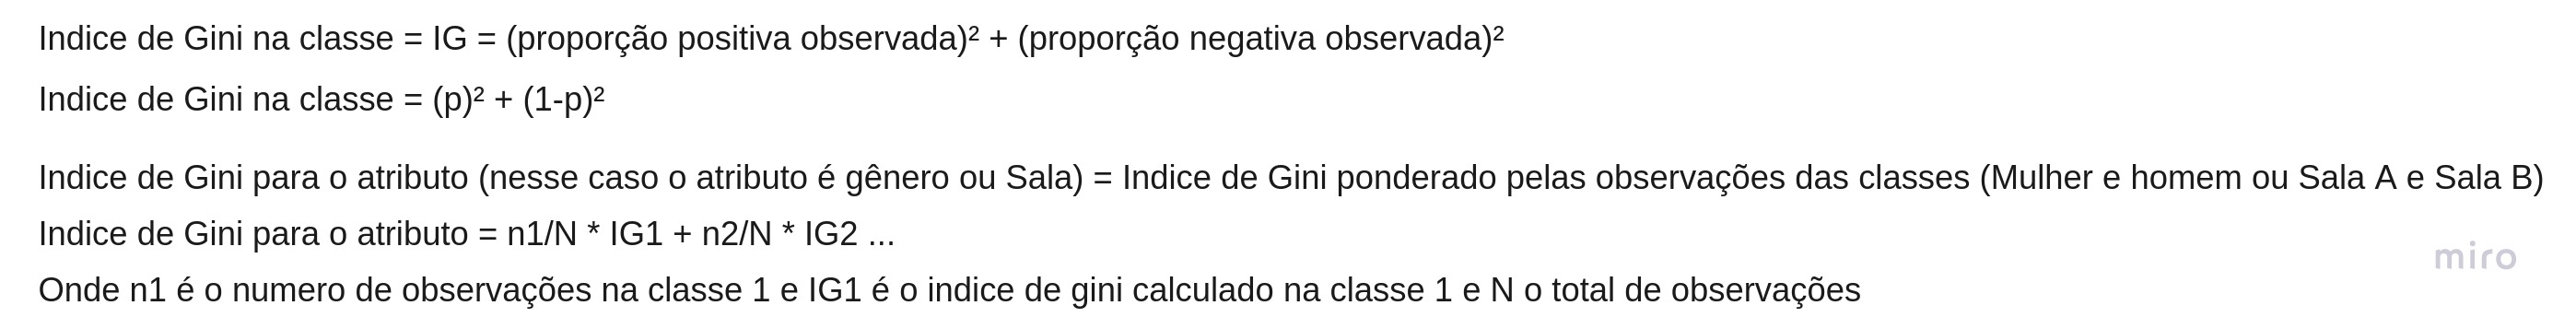

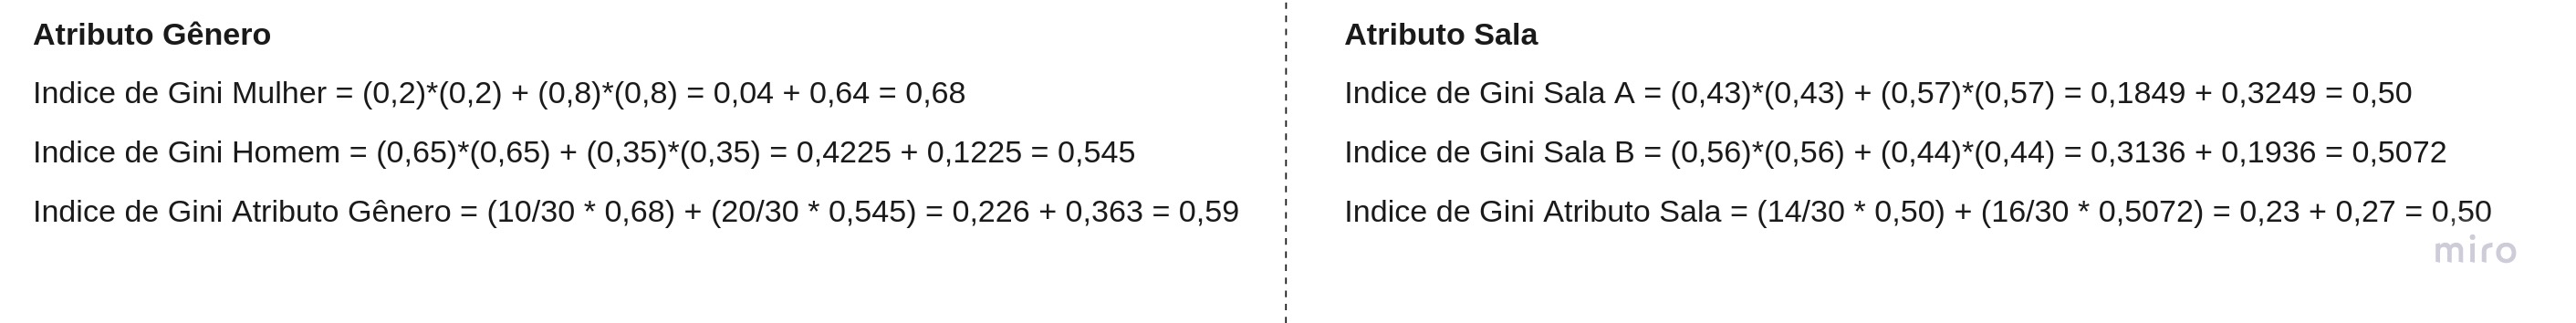

Sendo que o calculo do indice de Gini para o atributo Gênero e maior que o indice de Gini para o atributo Sala, então concluimos que o atributo que melhor divide em grupos homogêneos é o **Gênero**

#### **Formas de se evitar o overtting**

*   Número mínimo de amostras para a divisão do nó
*   Número mínimo de amostras para o nível folha - principalmente pra dados desbalanceados
*   Profundidade Máxima da árvore
*   Número máximo de features para considerar durante a divisão






#### **Aplicações**

##### Importando as bibliotecas necessárias

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [3]:
df_diabetes = pd.read_csv("/content/drive/MyDrive/Mentoria/Analise de dados/Arvores de decisão/diabetes.csv")

In [4]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_diabetes.drop('Outcome', axis = 1),df_diabetes['Outcome'],test_size=0.30)

In [15]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
415,3,173,84,33,474,35.7,0.258,22
714,3,102,74,0,0,29.5,0.121,32
245,9,184,85,15,0,30.0,1.213,49
197,3,107,62,13,48,22.9,0.678,23
145,0,102,75,23,0,0.0,0.572,21


##### Instanciando o objeto classificador

In [58]:
clf = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=5,min_samples_split=5,min_samples_leaf=1)

In [59]:
clf

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

##### Parâmetros do classificador



*   criterion:medida de qualidade da divisão
*   splitter:estrategia utilizada para dividir o nó de decisão
*   max_depth:profundida máxima da árvore
*   min_samples_split:número de amostras mínimas para considerar um nó de divisão
*   min_samples_leaf:número de amostras mínimas no nível folha







##### Treinando o modelo de arvore de decisão

In [60]:
clf = clf.fit(X_train,y_train)

##### Validando a importancia das variáveis

In [61]:
clf.feature_importances_

array([0.03137923, 0.60046583, 0.00359435, 0.00790757, 0.        ,
       0.16592898, 0.07531484, 0.11540921])

In [62]:
for feature,importance in zip(df_diabetes.columns,clf.feature_importances_):
  #print(importance)
  print("{}:{}".format(feature,importance))

Pregnancies:0.03137923000132053
Glucose:0.6004658347732071
BloodPressure:0.0035943481637876456
SkinThickness:0.00790756596033277
Insulin:0.0
BMI:0.16592897615026062
DiabetesPedigreeFunction:0.07531483781313672
Age:0.11540920713795466


In [63]:
resultado = clf.predict(X_test)

In [32]:
resultado

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [64]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       159
           1       0.60      0.51      0.55        72

    accuracy                           0.74       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.73      0.74      0.73       231



##### Randerizando a árvore de forma gŕafica

In [40]:
#!pip install ipywidgets
#!pip install graphviz
#!pip install pydot

In [38]:
import pydot
import graphviz

In [ ]:
dot_data = export_graphviz(
    clf,##modelo treinado
    out_file=None,##arquivo de saida pra salvar a imagem
    feature_names=df_diabetes.drop('Outcome',axis=1).columns,##nome das features
    class_names=['0','1'],##nome da classe
    filled=True, rounded=True,
    proportion=True,
    node_ids=True,
    rotate=False,
    label='all',
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph

##### Renderizando a arvores de forma interativa - pois treinamos o modelo sem ajustar os parâmetros

In [41]:
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

In [45]:
# feature matrix

X,y = df_diabetes.drop('Outcome', axis=1),df_diabetes['Outcome']

# feature labels
feature_label = df_diabetes.drop('Outcome', axis=1).columns

# class label
class_label = ['0','1']

def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
  estimator = DecisionTreeClassifier(
      random_state=0,
      criterion=crit,
      splitter=split,
      max_depth=depth,
      min_samples_split=min_samples_split,
      min_samples_leaf=min_samples_leaf
  )
  estimator.fit(X,y)
  graph = Source(export_graphviz(
      estimator,
      out_file=None,
      feature_names=feature_label,
      impurity=True,
      filled = True))
  display(SVG(graph.pipe(format='svg')))
  return estimator

inter=interactive(plot_tree,
      crit = ['gini','entropy'],
      split = ['best','random'],##se a divisão sera feita pelo melhor atributo ou aleatorio
      depth = [1,2,3,4,5,10,20,30],
      min_samples_split=(1,5),
      min_samples_leaf=(1,5))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

##### Avaliando a complexidade do modelo usando fronteiras

In [47]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [51]:
def visualize_fronteiras(msamples_split,max_depth):
  X = df_diabetes[['Glucose','Insulin']].values
  y = df_diabetes.Outcome.values
  clf = DecisionTreeClassifier(min_samples_split=msamples_split,max_depth=max_depth)
  tree = clf.fit(X,y)

  plt.figure(figsize=(16,9))
  plot_decision_regions(X, y, clf=tree, legend=2)

  plt.xlabel('Glucose')
  plt.ylabel('Insulina')
  plt.title('Decision Tree')
  plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


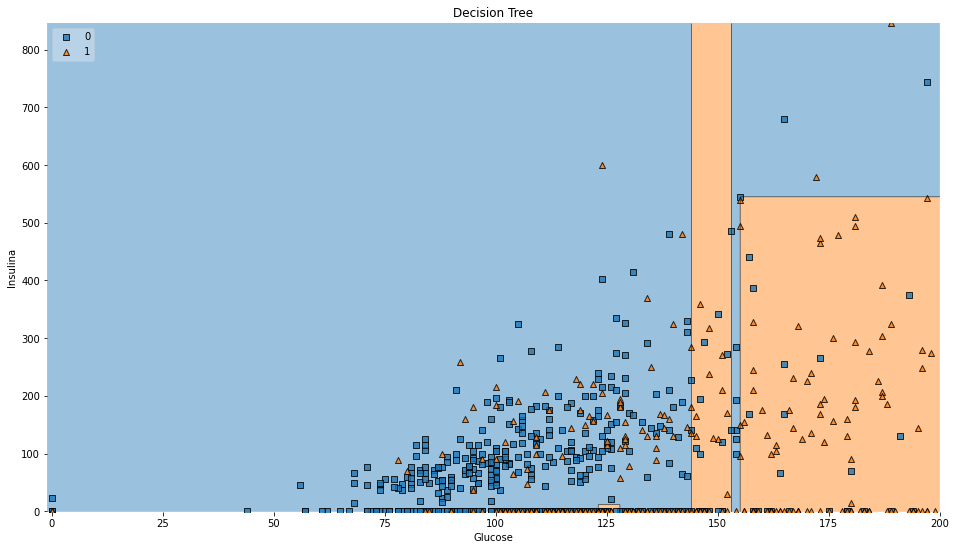

In [57]:
visualize_fronteiras(20,4)

##### Tuning do modelo para a escolha dos melhores parâmetros ( [Link Medium](https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3))